## Lecture 03: PCA and SVM

1. Preprocessing data transformations (`StandardScaler`, `PolynomialFeatures`)
2. Dimensionality reduction with Principal Component Analysis (PCA)

3. MNIST Fashion classification with PCA/LR and with a PCA/SVC pipelines




In [1]:
#enables the drawing of matplotlib figures in the IPython environment
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

In [2]:
#The make_blobs() function can be used to generate blobs of points with a Gaussian distribution. 
#Creating a complete random sample with given center(s) and standard deviation
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)


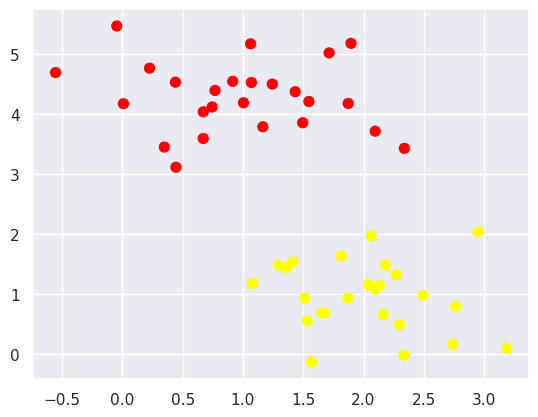

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC 
# parameter C defines how large or how small you want to create the margin seperating classes og the target variable
model = SVC(kernel='linear', C=10)
model.fit(X, y)

SVC(C=10, kernel='linear')

In [5]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        #To create the plot, the environment will be created by the following:
        #get current axis, here x and y will be created
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    #linespace - divide the x/y range(0 to 1) in to 30 equal pieces
    grid_x = np.linspace(xlim[0], xlim[1], 30)
    grid_y = np.linspace(ylim[0], ylim[1], 30)
    #using x and y, creating all x,y coordinates
    grid_Y, grid_X = np.meshgrid(grid_y, grid_x)
    # ravel - converting 2D in to 1D array
    # vstack - vertically arranging all x,y coodinates
    xy = np.vstack([grid_X.ravel(), grid_Y.ravel()]).T
    P = model.decision_function(xy).reshape(grid_X.shape)
    # plot decision boundary and margins
    ax.contour(grid_X, grid_Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

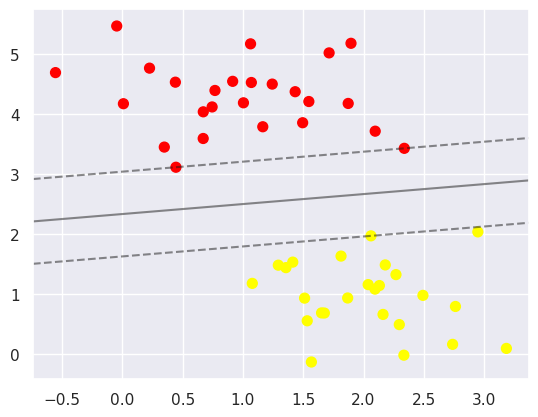

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [8]:
from sklearn import metrics
y_pred=model.predict(X)
print('Accuracy Score:')
print(metrics.accuracy_score(y,y_pred))

Accuracy Score:
1.0


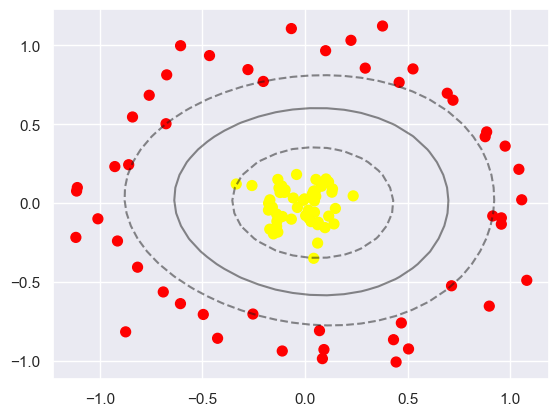

In [9]:
from sklearn.datasets import make_circles
X_new, y_new = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='rbf', C=1E6, gamma='auto').fit(X_new, y_new)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [10]:
from sklearn.metrics import accuracy_score
clf.fit(X,y)
clf_pred = clf.predict(X)
accuracy_score(clf_pred,y)

1.0

In [11]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [12]:
(X_tr, y_tr), (X_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape, set(y_tr));

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


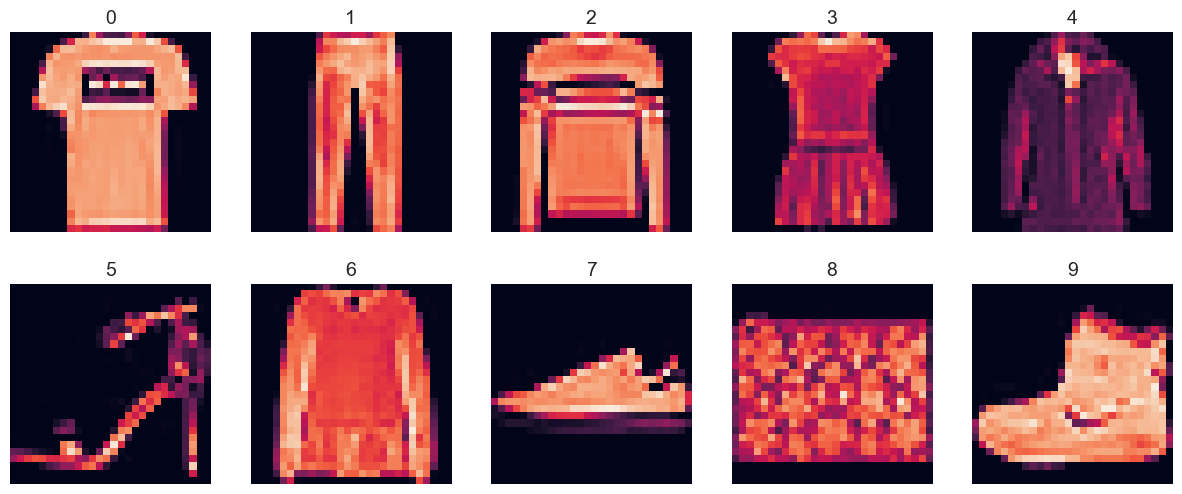

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.ravel()):
  x = X_tr[y_tr == i][0]
  ax.imshow(x)
  ax.set_axis_off()
  ax.set_title(f"{i}", fontsize=14)

0: T-shirt/top,
1: Trouser,
2: Pullover,
3: Dress,
4: Coat,
5: Sandal,
6: Shirt,
7: Sneaker,
8: Bag,
9: Ankle boot

In [15]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
%%time

from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(C=15, kernel="rbf")) #the radial basis function kernel
#SVC The fit time scales at least quadratically with the number of samples, The multiclass support is handled according to a one-vs-one scheme.
#C=15, C is Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
model.fit(X_tr.reshape(-1, 28*28), y_tr)

In [ ]:
print(X_tr.reshape(-1,28*28).shape)

In [ ]:
acc_tr = accuracy_score(y_tr, model.predict(X_tr.reshape(-1, 28*28)))
acc_te = accuracy_score(y_te, model.predict(X_te.reshape(-1, 28*28)))
ic(acc_tr, acc_te)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = make_pipeline(StandardScaler(), PCA(), SVC())

param_grid = {
    "pca__n_components": [2, 4, 6],
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"]
}

search = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=5)
search.fit(X_tr.reshape(-1, 28*28)[:1000], y_tr[:1000])

##PCA imputation example

https://asymptoticlabs.com/blog/posts/other_use_for_PCA_part2.html